In [183]:
#import necessary libraries for working with data
import pandas as pd 
import geopandas as gpd

# import necessary libraries for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# annotations
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
#from highlight_text import ax_text, fig_text
import matplotlib.patheffects as mpe

In [348]:
#pip install mapclassify
import mapclassify

In [391]:
datapath = 'E:/PAPERS/9thsem/climateindices/climpactMegacity/paperWeatherextremes/Mausam/updatedMaps/trend_etccdi.csv'
shape_path = 'E:/PAPERS/9thsem/climateindices/climpactMegacity/paperWeatherextremes/Mausam/updatedMaps/IndiaShapefile2020/India_State_Boundary.shp'

In [392]:
df = pd.read_csv(datapath)
print(df.columns)

Index(['OBJECTID', 'NAME', 'City', 'TMm', 'TXm', 'TNm', 'R95ptot_40yr',
       'R95PTOT', 'R99ptot_40yr', 'R99PTOT', 'CSDI', 'Summer days (SU25)',
       'Tropical nights (TR20)', 'TXx', 'TNn', 'TNx', 'TXn', 'DTR', 'WSDI',
       'WSDI1', 'csdi1', 'txgt50p', 'TX10p', 'TX90p', 'TN10p', 'TN90p',
       'txge30', 'txge35', 'CDD', 'CWD', 'R10mm', 'R20mm', 'Rx1day', 'Rx5day',
       'PRCPTOT_40yr', 'PRCPTOT', 'SDII', 'r95p_40yr', 'R95p', 'r99p_40yr',
       'R99p', 'Rx3day', 'R30mm'],
      dtype='object')


In [186]:
#print(df.info())

In [68]:
#print(df.describe())

In [31]:
#change column names
#df.columns = ['','','']

In [ ]:
#df.dropna(inplace=True)

In [ ]:
#df.head(3) #to see values contained in top 3 rows

In [393]:
#import and read shapefile stored as an object in earlier steps
shape = gpd.read_file(shape_path)
#print(shape)
#print(shape.info())

In [394]:
print(shape.columns) # to see name of available columns

Index(['State_Name', 'geometry'], dtype='object')


In [395]:
#join data and shapefile
df_shape = pd.merge(
    left = shape,
    right = df,
    left_on = 'State_Name',
    right_on = 'NAME',
    how ='left'
)

In [396]:
print(df_shape.info())
print(df_shape.columns)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State_Name              37 non-null     object  
 1   geometry                37 non-null     geometry
 2   OBJECTID                37 non-null     int64   
 3   NAME                    37 non-null     object  
 4   City                    37 non-null     object  
 5   TMm                     37 non-null     float64 
 6   TXm                     37 non-null     float64 
 7   TNm                     37 non-null     float64 
 8   R95ptot_40yr            37 non-null     float64 
 9   R95PTOT                 37 non-null     float64 
 10  R99ptot_40yr            37 non-null     float64 
 11  R99PTOT                 37 non-null     float64 
 12  CSDI                    37 non-null     float64 
 13  Summer days (SU25)      37 non-null     float64 
 14  Tropical nights (TR2

Mean of absolute temperatures

C:\Users\manja\AppData\Local\Temp\ipykernel_18456\2726304352.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


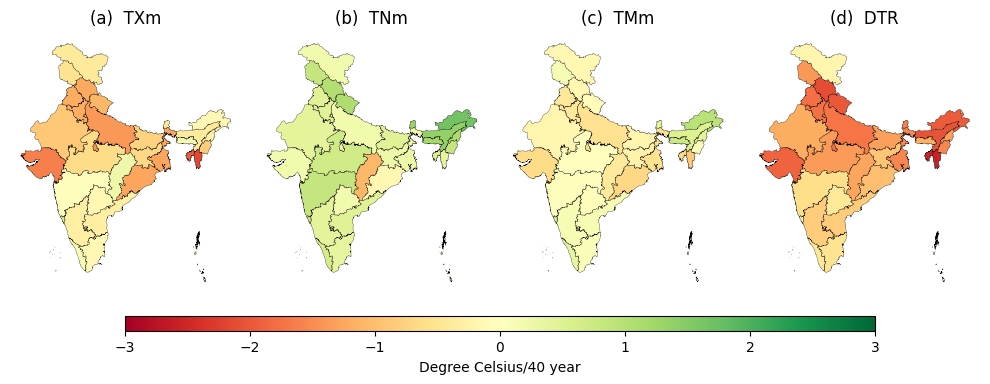

In [400]:
import textwrap

# define min and max values and colormap for the plots
vmin = -3
vmax = 3
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=4, 
                        figsize=(10, 6))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['TXm','TNm','TMm','DTR']
legend_plot = ['(a)','(b)', '(c)', '(d)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmin=vmin, vmax=vmax),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.13, 0.22, 0.75, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('Degree Celsius/40 year', rotation=0)

#Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Adjust spacing
plt.tight_layout()

# Set titles for the figure and the subplot respectively
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# display chart
plt.show()

C:\Users\manja\AppData\Local\Temp\ipykernel_18456\2210763158.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


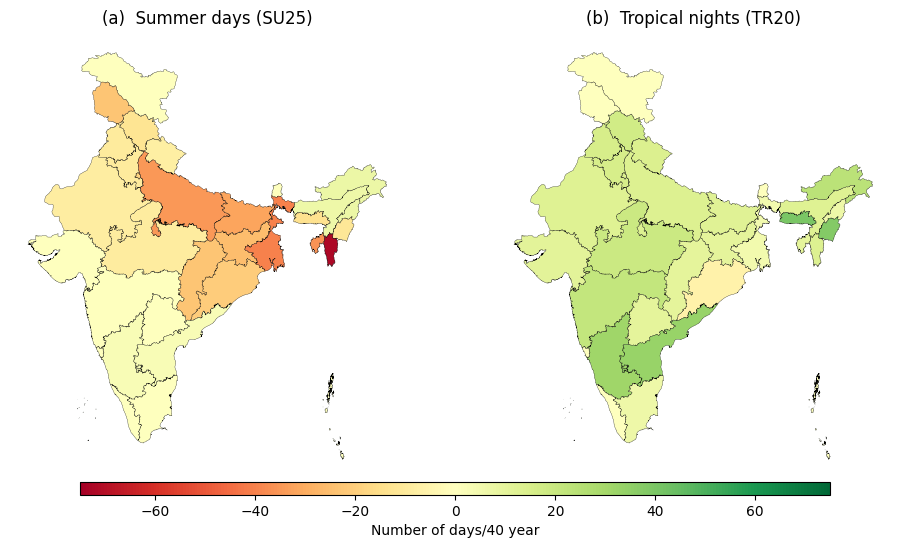

In [399]:
# threshold temperature SU25 and TR20
import textwrap

# define min and max values and colormap for the plots
vmin = -75
vmax = 75
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=2, 
                        figsize=(10, 5))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['Summer days (SU25)','Tropical nights (TR20)']
legend_plot = ['(a)','(b)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmin=vmin, vmax=vmax),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.13, 0, 0.75, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('Number of days/40 year', rotation=0)

#Adjust the spacing between subplots
#plt.subplots_adjust(wspace=0., hspace=0.1)

# Adjust spacing
plt.tight_layout()

# Set titles for the figure and the subplot respectively
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# display chart
plt.show()

C:\Users\manja\AppData\Local\Temp\ipykernel_18456\75953599.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


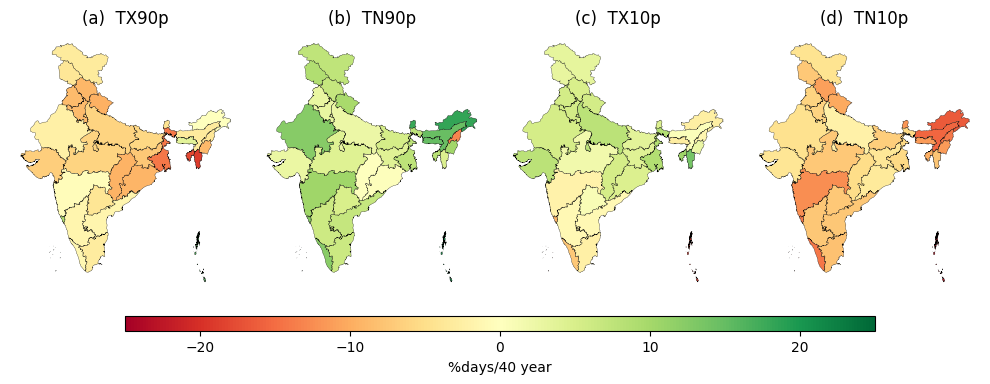

In [401]:
#temperature thresholds TX90p, TX10p, TN90p, TN10p
import textwrap

# define min and max values and colormap for the plots
vmin = -25
vmax = 25
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=4, 
                        figsize=(10, 6))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['TX90p','TN90p','TX10p','TN10p']
legend_plot = ['(a)','(b)', '(c)', '(d)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmin=vmin, vmax=vmax),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.13, 0.22, 0.75, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('%days/40 year', rotation=0)

#Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Adjust spacing
plt.tight_layout()

# Set titles for the figure and the subplot respectively
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# display chart
plt.show()

C:\Users\manja\AppData\Local\Temp\ipykernel_18456\3510368466.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


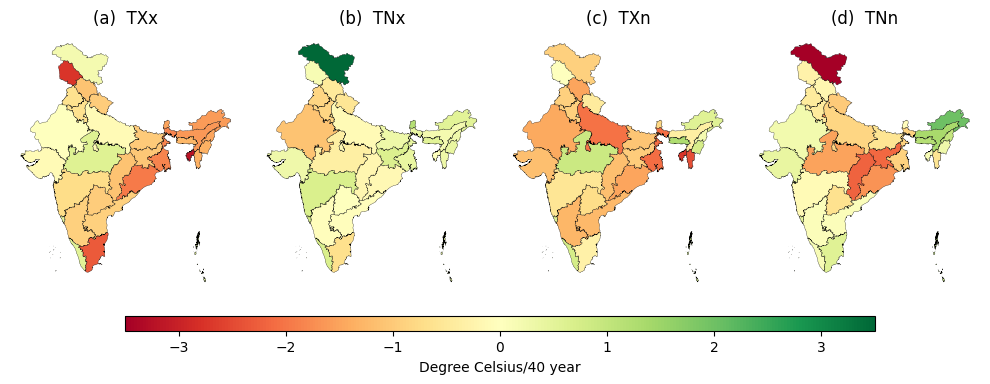

In [402]:
# Trend in annual maximum and minimums of temp
import textwrap

# define min and max values and colormap for the plots
vmin = -3.5
vmax = 3.5
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=4, 
                        figsize=(10, 6))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['TXx','TNx','TXn','TNn']
legend_plot = ['(a)','(b)', '(c)', '(d)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmin=vmin, vmax=vmax),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.13, 0.22, 0.75, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('Degree Celsius/40 year', rotation=0)

#Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Adjust spacing
plt.tight_layout()

# Set titles for the figure and the subplot respectively
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# display chart
plt.show()

C:\Users\manja\AppData\Local\Temp\ipykernel_18456\1514160590.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


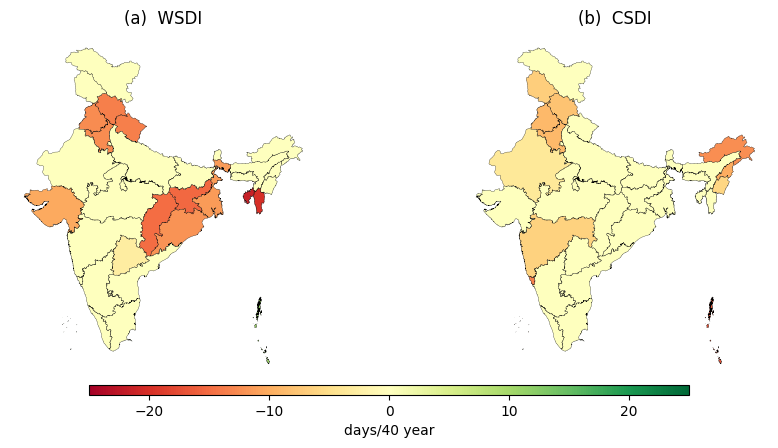

In [409]:
# trend of WSDI and CSDI 6days
import textwrap

# define min and max values and colormap for the plots
vmin = -25
vmax = 25
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=2, 
                        figsize=(10, 4))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['WSDI','CSDI']
legend_plot = ['(a)','(b)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmin=vmin, vmax=vmax),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.2, 0, 0.6, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('days/40 year', rotation=0)

#Adjust the spacing between subplots
#plt.subplots_adjust(wspace=0., hspace=0.1)

# Adjust spacing
plt.tight_layout()

# Set titles for the figure and the subplot respectively
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# display chart
plt.show()

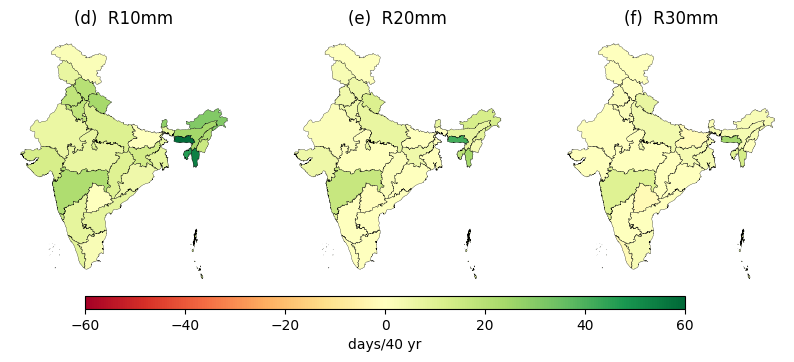

In [336]:
#Rainfall threshold indices R10mm, R20mm, R30mm
import textwrap

# define min and max values and colormap for the plots
vmin = -60
vmax = 60
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=3, 
                        figsize=(10, 5))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['R10mm','R20mm', 'R30mm']
legend_plot = ['(d)','(e)','(f)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmax=vmax, vmin=vmin),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.20, 0.20, 0.6, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('days/40 yr', rotation=0)

# display chart
plt.show()

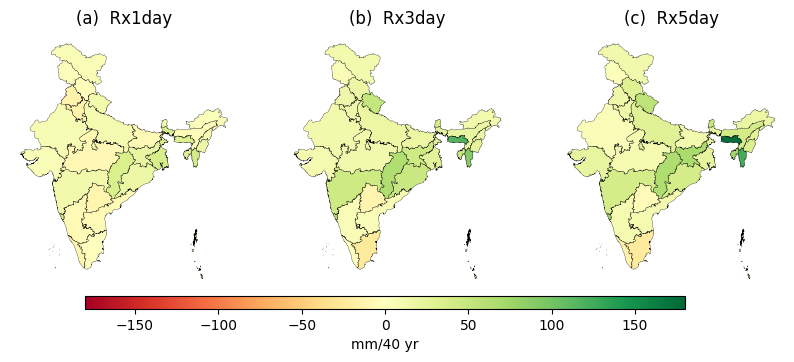

In [337]:
#Rainfall threshold indices Rx1day, Rx3day, Rx5day
import textwrap

# define min and max values and colormap for the plots
vmin = -180
vmax = 180 
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=3, 
                        figsize=(10, 5))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['Rx1day','Rx3day', 'Rx5day']
legend_plot = ['(a)','(b)','(c)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmax=vmax, vmin=vmin),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.2, 0.2, 0.6, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 2)
cbar.set_label('mm/40 yr', rotation=0)

# display chart
plt.show()

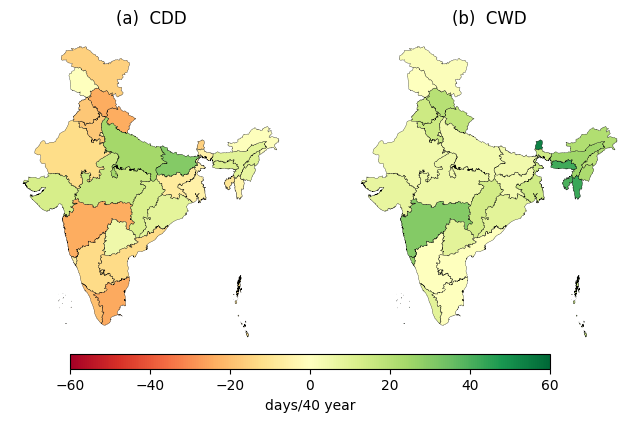

In [410]:
# plot Rainfall threshold indices CDD, CWD, SDII
import textwrap

# define min and max values and colormap for the plots
vmin = -60
vmax = 60
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=2, 
                        figsize=(8, 6))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['CDD','CWD']
legend_plot = ['(a)','(b)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmax=vmax, vmin=vmin),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.20, 0.20, 0.6, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('days/40 year', rotation=0)

#Adjust the spacing between subplots
#plt.subplots_adjust(wspace=0., hspace=0.1)

# Adjust spacing
#plt.tight_layout()

# Set titles for the figure and the subplot respectively
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# display chart
plt.show()

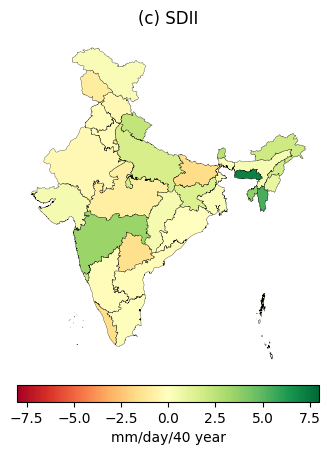

In [411]:
# plot SDII
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

import matplotlib.colors
#ax = df_shape.boundary.plot(edgecolor = 'black', linewidth = 0.2)
df_shape.plot(column = 'SDII',
              ax = ax,
              cax = cax,
              edgecolor='black',
              linewidth = 0.2,
              legend=True,
              legend_kwds = {"label": "mm/day/40 year",'orientation':'horizontal'}, 
              cmap='RdYlGn', 
              vmin = -8, 
              vmax = 8)
#drop axis values
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#remove axis
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

#cbar.set_label('mm/40 yr', rotation=0)

#add title
ax.set_title(f"{'(c) SDII'}", loc = 'center')

# Adjust spacing
#plt.tight_layout()
plt.show()

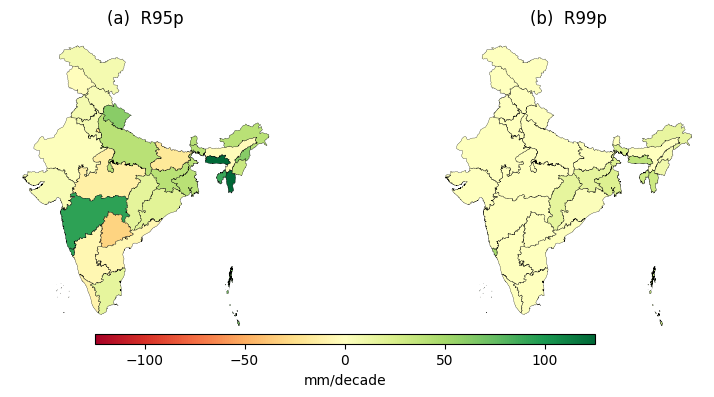

In [416]:
# plot Rainfall threshold indices R95p R99p
import textwrap

# define min and max values and colormap for the plots
vmin = -125
vmax = 125
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=2, 
                        figsize=(10, 4))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['R95p','R99p']
legend_plot = ['(a)','(b)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmax=vmax, vmin=vmin),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.25, 0.1, 0.5, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 1)
cbar.set_label('mm/decade', rotation=0)

#Adjust the spacing between subplots
#plt.subplots_adjust(wspace=0., hspace=0.1)

# Adjust spacing
#plt.tight_layout()

# Set titles for the figure and the subplot respectively
#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# display chart
plt.show()

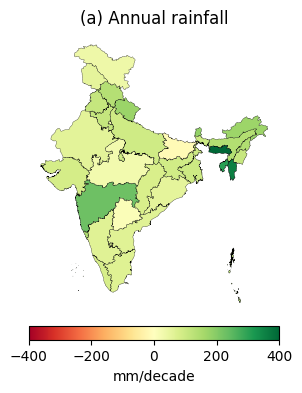

In [388]:
#plot Rainfall indices Prcptot, R95ptot, R99ptot
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

import matplotlib.colors
#ax = df_shape.boundary.plot(edgecolor = 'black', linewidth = 0.2)
df_shape.plot(column = 'PRCPTOT',
              ax = ax,
              cax = cax,
              edgecolor='black',
              linewidth = 0.2,
              legend=True,
              legend_kwds = {"label": "mm/decade",'orientation':'horizontal'}, 
              cmap='RdYlGn', 
              vmin = -400, 
              vmax = 400)
#drop axis values
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#remove axis
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

#cbar.set_label('mm/40 yr', rotation=0)

#add title
ax.set_title(f"{'(a) Annual rainfall'}", loc = 'center')

# Adjust spacing
#plt.tight_layout()
plt.show()

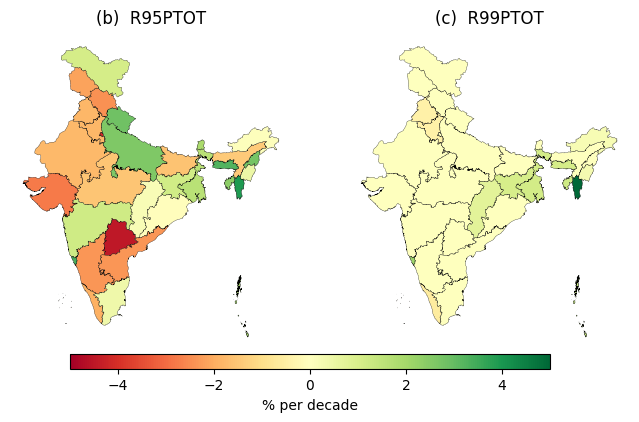

In [390]:
# #Rainfall threshold indices R95ptot, R99ptot
import textwrap

# define min and max values and colormap for the plots
vmin = -5
vmax = 5 
cmap = 'RdYlGn'

# Initiate the maps
def plot_map_on_ax(column, ax):
    """
    Add a map on a given axis
    """
    df_shape.plot(
        column=column,
        edgecolor='black', linewidth=0.2,
        ax=ax,
        cmap=cmap, 
        vmin = vmin, 
        vmax = vmax
    )
    ax.axis('off')

# initialize the figure
fig, axs = plt.subplots(nrows=1, 
                        ncols=2, 
                        figsize=(8, 6))
axs = axs.flatten()

# create list of columns that we use to display maps
columns = ['R95PTOT','R99PTOT']
legend_plot = ['(b)','(c)']

for i, (ax, column) in enumerate(zip(axs, columns)):

    # add map on the current axe
    plot_map_on_ax(column=column, ax=ax)
    ax.set_title(f"{legend_plot[i]}  {columns[i]}")

# display legend
#plt.legend()

# define a mappable based on which the colorbar will be drawn
mappable = cm.ScalarMappable(
    norm=mcolors.Normalize(vmax=vmax, vmin=vmin),
    cmap=cmap)

# define position and extent of colorbar
cb_ax = fig.add_axes([0.2, 0.2, 0.6, 0.025])

# draw colorbar
cbar = fig.colorbar(mappable, cax=cb_ax, location='bottom', shrink = 2)
cbar.set_label('% per decade', rotation=0)

# display chart
plt.show()

In [ ]:
### plot individual rainfall indices

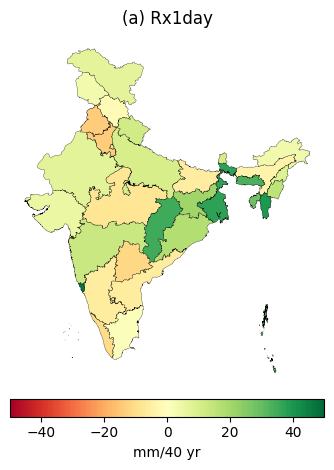

In [295]:
#plot Rx1day
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

import matplotlib.colors
#ax = df_shape.boundary.plot(edgecolor = 'black', linewidth = 0.2)
df_shape.plot(column = 'Rx1day',
              ax = ax,
              cax = cax,
              edgecolor='black',
              linewidth = 0.2,
              legend=True,
              legend_kwds = {"label": "mm/40 yr",'orientation':'horizontal'}, 
              cmap='RdYlGn', 
              vmin = -50, 
              vmax = 50)
#drop axis values
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#remove axis
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

#cbar.set_label('mm/40 yr', rotation=0)

#add title
ax.set_title(f"{'(a) Rx1day'}", loc = 'center')

# Adjust spacing
plt.tight_layout()
plt.show()

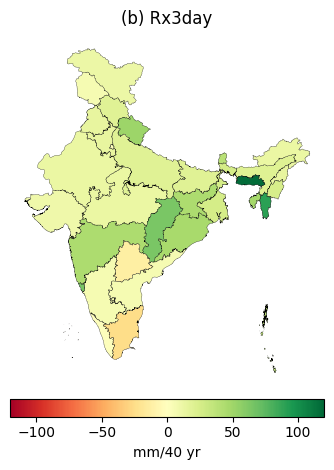

In [296]:
#plot Rx3day
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

import matplotlib.colors
#ax = df_shape.boundary.plot(edgecolor = 'black', linewidth = 0.2)
df_shape.plot(column = 'Rx3day',
              ax = ax,
              cax = cax,
              edgecolor='black',
              linewidth = 0.2,
              legend=True,
              legend_kwds = {"label": "mm/40 yr",'orientation':'horizontal'}, 
              cmap='RdYlGn', 
              vmin = -120, 
              vmax = 120)
#drop axis values
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#remove axis
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

#cbar.set_label('mm/40 yr', rotation=0)

#add title
ax.set_title(f"{'(b) Rx3day'}", loc = 'center')

# Adjust spacing
plt.tight_layout()
plt.show()

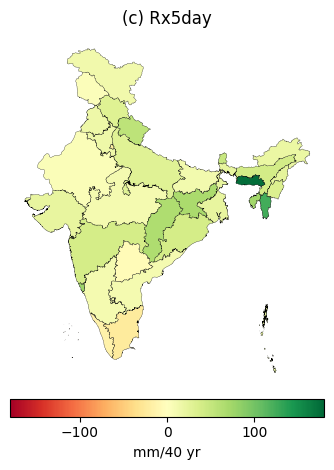

In [318]:
#plot Rx5day
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

import matplotlib.colors
#ax = df_shape.boundary.plot(edgecolor = 'black', linewidth = 0.2)
df_shape.plot(column = 'Rx5day',
              ax = ax,
              cax = cax,
              edgecolor='black',
              linewidth = 0.2,
              legend=True,
              legend_kwds = {"label": "mm/40 yr",'orientation':'horizontal'}, 
              cmap='RdYlGn', 
              vmin = -180, 
              vmax = 180)
#drop axis values
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#remove axis
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

#cbar.set_label('mm/40 yr', rotation=0)

#add title
ax.set_title(f"{'(c) Rx5day'}", loc = 'center')

# Adjust spacing
plt.tight_layout()
plt.show()

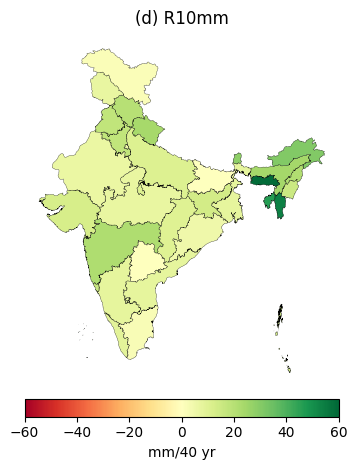

In [313]:
# plot number of days receiving atleast 10mm of rainfall
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

import matplotlib.colors
#ax = df_shape.boundary.plot(edgecolor = 'black', linewidth = 0.2)
df_shape.plot(column = 'R10mm',
              ax = ax,
              cax = cax,
              edgecolor='black',
              linewidth = 0.2,
              legend=True,
              legend_kwds = {"label": "mm/40 yr",'orientation':'horizontal'}, 
              cmap='RdYlGn', 
              vmin = -60, 
              vmax = 60)
#drop axis values
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#remove axis
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

#cbar.set_label('days/40 yr', rotation=0)

#add title
ax.set_title(f"{'(d) R10mm'}", loc = 'center')

# Adjust spacing
plt.tight_layout()
plt.show()

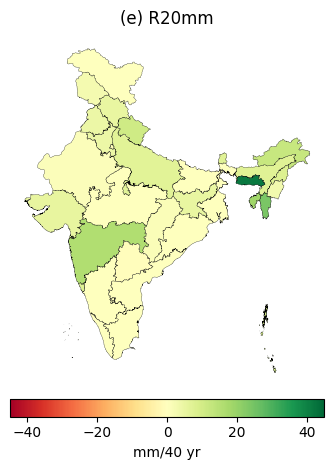

In [317]:
# plot number of days receiving atleast 10mm of rainfall
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

import matplotlib.colors
#ax = df_shape.boundary.plot(edgecolor = 'black', linewidth = 0.2)
df_shape.plot(column = 'R20mm',
              ax = ax,
              cax = cax,
              edgecolor='black',
              linewidth = 0.2,
              legend=True,
              legend_kwds = {"label": "mm/40 yr",'orientation':'horizontal'}, 
              cmap='RdYlGn', 
              vmin = -45, 
              vmax = 45)
#drop axis values
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#remove axis
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)

#cbar.set_label('days/40 yr', rotation=0)

#add title
ax.set_title(f"{'(e) R20mm'}", loc = 'center')

# Adjust spacing
plt.tight_layout()
plt.show()